https://scikit-learn.org/stable/auto_examples/covariance/plot_mahalanobis_distances.html

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import pickle
import os
import seaborn as sns
import copy

from sklearn.covariance import EmpiricalCovariance, MinCovDet
from sklearn.model_selection import train_test_split

In [2]:
path = os.path.abspath(os.path.join(os.getcwd(), '..', 'data', 'creditcard.csv')) 
df = pd.read_csv(path)

In [3]:
df['Time_diff_from_previous'] = df['Time'].diff()
df['Time_diff_from_previous'].iloc[0] = 0
df['Time_diff_from_last'] = df['Time'].diff().iloc[1:].reset_index(drop=True)
df['Time_diff_from_last'].iloc[-1] = 0
display(df.head())
display(df.tail())

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Time_diff_from_previous,Time_diff_from_last
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0,1.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.0,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0,1.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,1.0,0.0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Time_diff_from_previous,Time_diff_from_last
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,1.0,1.0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,1.0,1.0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,1.0,0.0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,0.0,4.0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0,4.0,0.0


In [4]:
df = df.drop('Time', 1)
df['Amount'] = df['Amount']/df['Amount'].max()

In [5]:
dataX = df.copy().drop(['Class'],axis=1)
dataY = df['Class'].copy()

X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, 
                                                    test_size=0.33, random_state=2018, stratify=dataY)

In [6]:
print(y_train.head())
print(y_train.index)

142087    0
165168    0
235908    0
148255    0
145672    0
Name: Class, dtype: int64
Int64Index([142087, 165168, 235908, 148255, 145672, 277038, 228711, 135075,
             21964,  54269,
            ...
            186563, 254976, 172762, 189642, 246836,  30023, 195475,  48687,
            159608, 197673],
           dtype='int64', length=190820)


In [7]:
normal_data = X_train[y_train==0]
normal_data_idx = normal_data.index
normal_data = normal_data.reset_index(drop=True)
print(normal_data_idx)
display(normal_data.head())
print(normal_data.shape)

Int64Index([142087, 165168, 235908, 148255, 145672, 277038, 228711, 135075,
             21964,  54269,
            ...
            186563, 254976, 172762, 189642, 246836,  30023, 195475,  48687,
            159608, 197673],
           dtype='int64', length=190490)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Time_diff_from_previous,Time_diff_from_last
0,-1.981958,1.933460,0.305345,-0.356982,-0.533313,-0.065841,-0.238248,1.113825,-0.242343,0.412512,...,-0.568387,0.098089,-0.355334,-0.084147,0.111366,0.212020,0.156344,0.000545,1.0,0.0
1,0.141365,1.098390,-0.366686,-0.538319,0.965420,-0.844916,1.037264,-0.164037,-0.183759,-0.860538,...,-0.754674,0.092707,0.653494,-0.397063,0.106378,0.227831,0.086810,0.000151,3.0,0.0
2,0.195044,-0.643710,-1.432682,-2.112563,-0.124961,-1.171783,1.558808,-0.689223,-3.030623,1.064250,...,1.488893,0.335824,1.143004,-0.495214,0.093904,0.159268,0.268700,0.008306,1.0,0.0
3,0.030601,0.859108,0.290804,-0.591915,0.441892,-1.033405,1.016281,-0.190080,-0.066897,-0.425748,...,-0.537176,0.081516,-0.016869,-0.498699,0.142886,0.250215,0.097351,0.000233,0.0,3.0
4,0.017960,0.866609,0.263352,-0.473687,1.057894,0.672911,0.331240,0.225852,-0.204932,-0.907905,...,-0.330969,0.031092,-0.440669,-1.138396,-0.071485,0.236466,0.251605,0.000194,1.0,1.0


(190490, 31)


In [8]:
novel_data = X_train[y_train==1]
novel_data_idx = novel_data.index
novel_data = novel_data.reset_index(drop=True)
print(novel_data_idx)
display(novel_data.head())
print(novel_data.shape)

Int64Index([154633,  68522,  77348, 234633, 249963,  43681, 203328, 189878,
             46998, 102446,
            ...
              8845, 152019,  42936,  18809,  42528,  42958,  95597,  55401,
             57248,  42635],
           dtype='int64', length=330)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Time_diff_from_previous,Time_diff_from_last
0,-1.020632,1.496959,-4.490937,1.836727,0.627318,-2.735569,-1.546274,0.459822,-0.682741,-4.363102,...,0.860618,-0.304666,-0.155500,0.412166,-0.220080,0.392338,-0.020089,8.578826e-04,2.0,1.0
1,0.206075,1.387360,-1.045287,4.228686,-1.647549,-0.180897,-2.943678,0.859156,-1.181743,-3.096504,...,0.344930,-0.203799,0.376640,0.715485,0.226003,0.628545,0.319918,2.958216e-05,0.0,0.0
2,-1.271244,2.462675,-2.851395,2.324480,-1.372245,-0.948196,-3.065234,1.166927,-2.268771,-4.881143,...,0.081931,-0.221348,-0.523582,0.224228,0.756335,0.632800,0.250187,3.892389e-07,0.0,1.0
3,1.261324,2.726800,-5.435019,5.342759,1.447043,-1.442584,-0.898702,0.123062,-2.748496,-3.202436,...,-0.425938,-0.154440,-0.018820,0.632234,0.192922,0.468181,0.280486,6.188899e-05,0.0,1.0
4,-0.679521,4.672553,-6.814798,7.143500,0.928654,-1.873013,-2.306689,0.993702,-4.944054,-5.576419,...,-0.321691,-0.281325,-1.120256,-0.073394,0.553530,0.760542,0.386742,2.997140e-05,1.0,0.0


(330, 31)


In [9]:
# Euclidean Distance

from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(
  eps = 0.5,
  metric="euclidean",
  min_samples = 3,
  n_jobs = -1)
clusters = outlier_detection.fit_predict(X_train)
clusters

array([ -1,  -1,  -1, ...,  -1, 220,  -1], dtype=int64)

              V1        V2
142087 -1.981958  1.933460
165168  0.141365  1.098390
235908  0.195044 -0.643710
148255  0.030601  0.859108
145672  0.017960  0.866609


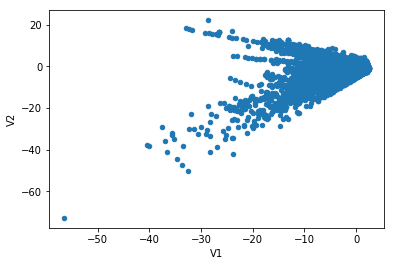

In [10]:
print(X_train.loc[:, ["V1", "V2"]].head())
X_train.loc[:, ["V1", "V2"]].plot.scatter(x="V1", y="V2")

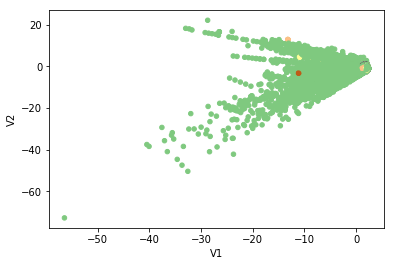

In [11]:
from matplotlib import cm
cmap = cm.get_cmap('Accent')
X_train.loc[:, ["V1", "V2"]].plot.scatter(
  x = "V1",
  y = "V2",
  c = clusters,
  cmap = cmap,
  colorbar = False
)

In [ ]:
# Mahalanobis Distance

outlier_detection = DBSCAN(
  eps = 0.5,
  metric = 'mahalanobis',
  min_samples = 8,
  algorithm = 'brute',
  n_jobs = -1)

clusters = outlier_detection.fit_predict(X_train)
clusters

In [ ]:
dataset = pd.DataFrame({'V1':X_train[:,0],'V2':X_train[:,1]})
#X_train.loc[:, ["V1", "V2"]]

cmap = cm.get_cmap('Accent')
dataset.plot.scatter(
  x = "V1",
  y = "V2",
  c = clusters,
  cmap = cmap,
  colorbar = False
)